In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import shap



In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


2024-07-24 16:53:15.206390: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:

# Load preprocessed train data
X_train = np.load('X_train_sample.npy')
y_train = np.load('y_train_sample.npy')

n_features = X_train.shape[1]
n_classes = len(np.unique(y_train))

In [4]:
def plot_history(history):
    # Plot training & validation loss values
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot training & validation accuracy values
    plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
    plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [5]:
# Create Network with Sequential model
model = keras.Sequential(
    [
        layers.Input(shape=(n_features)),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(32, activation='relu'),
        layers.Dense(n_classes, activation='softmax')
    ]
)

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=keras.optimizers.Adam(0.001),
    metrics=['sparse_categorical_accuracy']
)

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4672      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 15)                495       
                                                                 
Total params: 7,247
Trainable params: 7,247
Non-trainable params: 0
_________________________________________________________________
None


2024-07-24 16:53:18.753120: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [6]:
# Checkpoint callback

checkpoint_filepath = 'model_checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_sparse_categorical_accuracy',
    mode='max',
    save_best_only=True
)

In [7]:
# Train model
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_split=0.2,
    callbacks=[model_checkpoint_callback],
    verbose=1
)

Epoch 1/100
6000/6000 [==============================] - 16s 3ms/step - loss: 0.2054 - sparse_categorical_accuracy: 0.9352 - val_loss: 0.1178 - val_sparse_categorical_accuracy: 0.9564
Epoch 2/100
6000/6000 [==============================] - 16s 3ms/step - loss: 0.1234 - sparse_categorical_accuracy: 0.9555 - val_loss: 0.1025 - val_sparse_categorical_accuracy: 0.9655
Epoch 3/100
6000/6000 [==============================] - 19s 3ms/step - loss: 0.1113 - sparse_categorical_accuracy: 0.9588 - val_loss: 0.0980 - val_sparse_categorical_accuracy: 0.9665
Epoch 4/100
6000/6000 [==============================] - 23s 4ms/step - loss: 0.1033 - sparse_categorical_accuracy: 0.9606 - val_loss: 0.0963 - val_sparse_categorical_accuracy: 0.9658
Epoch 5/100
6000/6000 [==============================] - 27s 4ms/step - loss: 0.1003 - sparse_categorical_accuracy: 0.9614 - val_loss: 0.0924 - val_sparse_categorical_accuracy: 0.9677
Epoch 6/100
6000/6000 [==============================] - 18s 3ms/step - loss: 0.

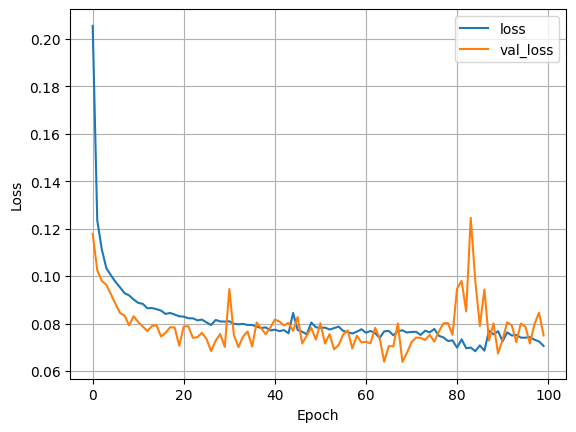

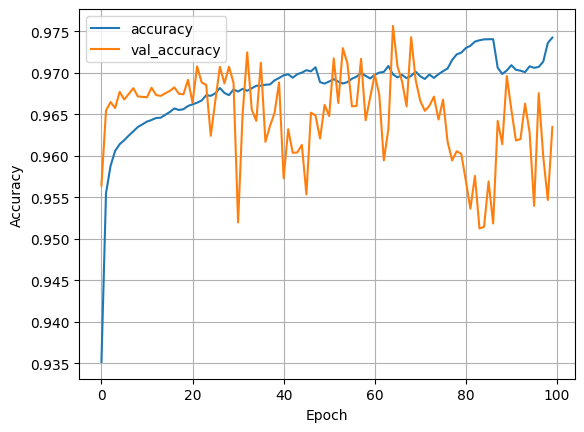

In [11]:
# Plot history
plot_history(history)

In [13]:
# Load best model and evaluate
model.load_weights(checkpoint_filepath)

# Load preprocessed test data
X_test = np.load('X_test_sample.npy')
y_test = np.load('y_test_sample.npy')

# Evaluate model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

3750/3750 [==============================] - 8s 2ms/step - loss: 0.0652 - sparse_categorical_accuracy: 0.9769
Loss: 0.06522185355424881, Accuracy: 0.9768833518028259


In [20]:
# Load label encoder
import joblib
label_encoder = joblib.load('label_encoder.pkl')
class_names = label_encoder.classes_
class_names

/home/lipsker/anaconda3/envs/tf/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator LabelEncoder from version 1.2.2 when using version 1.5.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array(['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk',
       'DoS Slowhttptest', 'DoS slowloris', 'FTP-Patator', 'Heartbleed',
       'Infiltration', 'PortScan', 'SSH-Patator',
       'Web Attack – Brute Force', 'Web Attack – Sql Injection',
       'Web Attack – XSS'], dtype=object)

In [38]:
# Feature names
feature_names = ['Flow Duration', 'Total Fwd Packets', 'Total Backward Packets',
       'Total Length of Fwd Packets', 'Total Length of Bwd Packets',
       'Fwd Packet Length Max', 'Fwd Packet Length Min',
       'Fwd Packet Length Mean', 'Fwd Packet Length Std',
       'Bwd Packet Length Max', 'Bwd Packet Length Min',
       'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s',
       'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max',
       'Flow IAT Min', 'Fwd IAT Total', 'Fwd IAT Mean', 'Fwd IAT Std',
       'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Total', 'Bwd IAT Mean',
       'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags',
       'Fwd URG Flags', 'Fwd Header Length', 'Bwd Header Length',
       'Fwd Packets/s', 'Bwd Packets/s', 'Min Packet Length',
       'Max Packet Length', 'Packet Length Mean', 'Packet Length Std',
       'Packet Length Variance', 'FIN Flag Count', 'SYN Flag Count',
       'RST Flag Count', 'PSH Flag Count', 'ACK Flag Count', 'URG Flag Count',
       'CWE Flag Count', 'ECE Flag Count', 'Down/Up Ratio',
       'Average Packet Size', 'Avg Fwd Segment Size', 'Avg Bwd Segment Size',
       'Fwd Header Length.1', 'Subflow Fwd Packets', 'Subflow Fwd Bytes',
       'Subflow Bwd Packets', 'Subflow Bwd Bytes', 'Init_Win_bytes_forward',
       'Init_Win_bytes_backward', 'act_data_pkt_fwd', 'min_seg_size_forward',
       'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean',
       'Idle Std', 'Idle Max', 'Idle Min', 'Protocol_0.0', 'Protocol_6.0',
       'Protocol_17.0']

## SHAP 

In [44]:
# Take for example a sample with label 'DDoS'
ddos_num_label = label_encoder.transform(['DDoS'])[0]
ddos_index = np.where(y_test == ddos_num_label)[0][0]
ddos_sample = X_test[ddos_index]

# Explain the sample
shap_values = explainer.shap_values(ddos_sample)
shap.initjs()
shap.force_plot(explainer.expected_value[ddos_num_label], shap_values[ddos_num_label], ddos_sample, feature_names=class_names)


6819/6819 [==============================] - 17s 2ms/step


DimensionError: Length of features is not equal to the length of shap_values!

In [43]:
len(feature_names), ddos_sample.shape, shap_values[0].shape, len(class_names)

(72, (72,), (15,), 15)